In [22]:
import pandas as pd

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
df = pd.read_csv('data/communities.data.prep')

In [3]:
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [8]:
X = df.loc[:, 'fold':'PolicBudgPerPop']
y = df[['ViolentCrimesPerPop']]

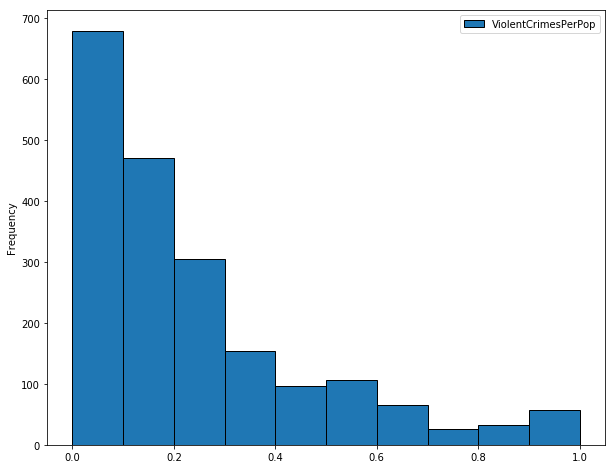

In [24]:
y.plot(kind='hist', edgecolor='k')
plt.show()

In [101]:
import os

exp_dir = 'experiments'
if not os.path.exists(exp_dir):
    os.mkdir(exp_dir)

app_dir = exp_dir + '/app_linear_regression'
if not os.path.exists(app_dir):
    os.mkdir(app_dir)

msg = \
    'WARNING this file is generated automatically. Do not edit it.\n\n' \
    'This directory contains experiment with scikin-learn LinearRegression model'\
    '\n'

with open(os.path.join(app_dir, 'note.txt'), 'w') as fp:
    fp.write(msg)

In [135]:
import time
import json
from sklearn.externals import joblib
from abc import ABC, abstractmethod

class Experiment(ABC):
    def __init__(self, approach_dir=''):
        self._approach_dir = approach_dir
    
    def run(self, opts, data, intel=None):
        self._initiate(intel)
        self._perform_experiment(opts)
        return self._finalize(opts)    
    
    def _initiate(self, intel=None):
        self._res = {}
        self._res['time_start'] = time.strftime("%Y-%m-%d-%H-%M-%S", time.gmtime())
        
        self._experiment_dir = os.path.join(self._approach_dir, self._res['time_start'])
        os.mkdir(self._experiment_dir)
        
        if intel:
            self._res = { **self._res, **intel }
        
    
    def _finalize(self, opts):
        self._res['time_end'] = time.strftime("%Y-%m-%d-%H-%M-%S", time.gmtime())
        
        with open(os.path.join(self._experiment_dir, 'opts.json'), 'w') as fp:
            json.dump(opts, fp)
        
        df = pd.DataFrame(self._res, index=[0])
        df.to_csv(os.path.join(self._experiment_dir, 'results.cvs'), index=None)
            
        return df
    
    def _add_observation(self, name, value):
        self._res[name] = value

    @abstractmethod
    def _perform_experiment(self, opts):
        pass    

In [136]:
from sklearn.linear_model import LinearRegression

class LRExperiment(Experiment):
    def _perform_experiment(self, opts):
        estimator = LinearRegression()
        estimator.set_params(**opts)
        estimator.fit(data['X_train'], data['y_train'])

        cod = estimator.score(data['X_test'], data['y_test'])
        self._add_observation('cod', cod)
        
        joblib.dump(estimator, os.path.join(self._experiment_dir, 'model.pkl')) # must be a better way to work with it

# Dropping all Nan records

In [103]:
intel = {
    'nan': 'nan records dropped'
}

In [74]:
import numpy as np
lines_to_keep = X.index[X.notna().all(axis=1)]
lines_to_keep

Int64Index([   0,   16,   20,   21,   23,   33,   35,   50,   51,   56,
            ...
            1949, 1954, 1957, 1963, 1965, 1969, 1981, 1991, 1992, 1993],
           dtype='int64', length=319)

In [83]:
X.loc[lines_to_keep].isna().any().any()

False

In [84]:
X.loc[lines_to_keep].head()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.29,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14
16,1,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,...,0.22,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26
20,1,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,...,0.36,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13
21,1,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,...,1.00,1.00,0.07,0.15,1.00,0.35,0.73,0.0,0.31,0.21
23,1,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,...,0.29,0.16,0.12,0.07,0.04,0.01,0.81,1.0,0.56,0.09


In [88]:
X = X.loc[lines_to_keep]
y = y.loc[lines_to_keep]

In [89]:
X.shape

(319, 123)

In [90]:
y.shape

(319, 1)

In [91]:
from sklearn.model_selection import train_test_split
seed = 8
test_size=0.3

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [94]:
X_train.shape

(223, 123)

In [137]:
experiment = LRExperiment(app_dir)

In [138]:
data = {
    'X_train': X_train,
    'y_train': y_train,
    'X_test': X_test,
    'y_test': y_test
}

experiment.run({}, data, intel)

,cod,nan,time_end,time_start
0,0.290624,nan records dropped,2018-03-04-09-21-19,2018-03-04-09-21-19


# Dropping columns with NaN

In [35]:
X.columns[X.notna().all()]

Index(['fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'HispPerCap', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
       'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ',
       'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids',
       'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
       'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig',
       'PctRecImmig5', 'PctRecImmig8',